In [1]:
from ete3 import Tree, TreeStyle, NodeStyle
from IPython.display import SVG, display
import matplotlib.pyplot as plt
import sys

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;


<IPython.core.display.Javascript object>

In [3]:
treeFiles=["gappy2/gap_aln_1_pep_FcC_supermatrix_B.fas_1-inf.phy.treefile", 
           "gappy2/gap_aln_2_pep_FcC_supermatrix_B.fas_2-inf.phy.treefile", 
           "gappy2/gap_aln_3_pep_FcC_supermatrix_B.fas_3-inf.phy.treefile", 
           "gappy2/gap_aln_4_pep_FcC_supermatrix_B.fas_4-inf.phy.treefile",
           "gappy2/gap_aln_5_pep_FcC_supermatrix_B.fas_5-inf.phy.treefile",
           "gappy2/gap_aln_6_pep_FcC_supermatrix_B.fas_6-inf.phy.treefile",
           "gappy2/gap_aln_7_pep_FcC_supermatrix_B.fas_7-inf.phy.treefile",
           "gappy2/gap_aln_8_pep_FcC_supermatrix_B.fas_8-inf.phy.treefile",
           "gappy2/gap_aln_9_pep_FcC_supermatrix_B.fas_9-inf.phy.treefile",
           "gappy2/gap_aln_10_pep_FcC_supermatrix_B.fas_10-inf.phy.treefile",  
           "gappy2/gap_aln_11_pep_FcC_supermatrix_B.fas_11-inf.phy.treefile",  
           "gappy2/gap_aln_12_pep_FcC_supermatrix_B.fas_12-inf.phy.treefile",  
           "gappy2/gap_aln_13_pep_FcC_supermatrix_B.fas_13-inf.phy.treefile",  
           "gappy2/gap_aln_14_pep_FcC_supermatrix_B.fas_14-inf.phy.treefile", 
           "gappy2/gap_aln_15_pep_FcC_supermatrix_B.fas_15-inf.phy.treefile",  
           "gappy2/gap_aln_16_pep_FcC_supermatrix_B.fas_16-inf.phy.treefile",  
           "gappy2/gap_aln_17_pep_FcC_supermatrix_B.fas_17-inf.phy.treefile",  
           "gappy2/gap_aln_18_pep_FcC_supermatrix_B.fas_18-inf.phy.treefile",  
           "gappy2/gap_aln_19_pep_FcC_supermatrix_B.fas_19-inf.phy.treefile",  
           "gappy2/gap_aln_20_pep_FcC_supermatrix_B.fas_20-inf.phy.treefile"
]
sizes = [3076,1086,622,389,271,221,179,152,141,123,113,101,98,91,89,87,84,81,75,71]
names = list()
for i in range(len(treeFiles)):
    names.append("Gaps larger than "+ treeFiles[i].split("_")[2] + "; " + str(sizes[i]) + " gaps total:")


In [4]:
treeFile = "gappy2/gap_aln_13_pep_FcC_supermatrix_B.fas_13-inf.phy.treefile"
def readTreeFromFile(file):
    try:
        f=open(file, 'r')
    except IOError:
        print ("Unknown file: "+file)
        sys.exit()

    line = ""
    for l in f:
        line += l.strip()
    
    f.close()
    t = Tree( line )
    return t


In [5]:
def plotPhylogram(t, scale):
    ancestor = t.get_common_ancestor("Lja", "Paq", "Cga")
    t.set_outgroup(ancestor)
    ts = TreeStyle()
    ts.min_leaf_separation= 0
    ts.scale = scale
    ts.show_branch_support = True
    nstyle = NodeStyle()
    nstyle["size"] = 0
    for n in t.traverse():
       n.set_style(nstyle)
    #t.render("%%inline", tree_style=ts)
    return t, ts

In [6]:
def plotCladogram(t):
    ancestor = t.get_common_ancestor("Lja", "Paq", "Cga")
    t.set_outgroup(ancestor)
    ts = TreeStyle()
    ts.min_leaf_separation= 0
    #ts.scale = 2020 
    nstyle = NodeStyle()
    nstyle["size"] = 0
    for n in t.traverse():
        n.dist = 1.0
        n.set_style(nstyle)
    #t.render("%%inline", tree_style=ts)
    return t, ts

# CAT-GTR tree
The CAT-GTR model is known to be resilient against long branch attraction problems.
I ran it on a random subset of 10,000 positions.

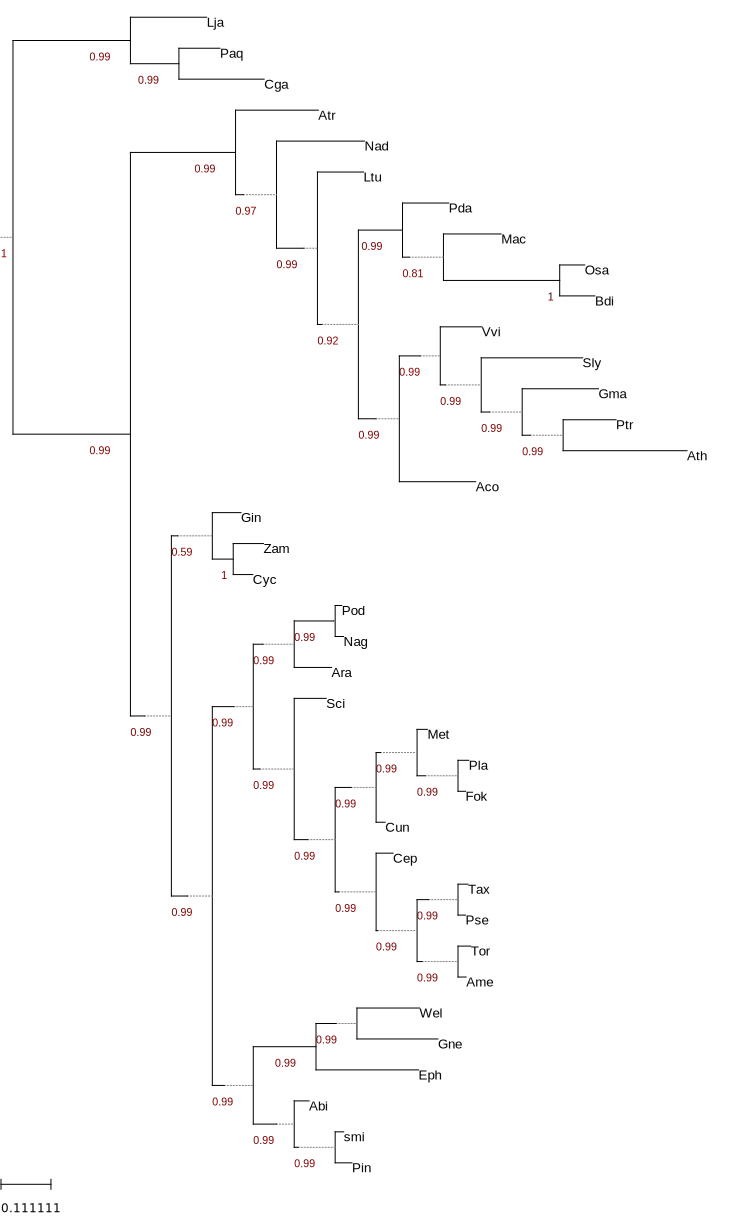

In [7]:
t = readTreeFromFile("bpcomp.con.tre")
t, ts = plotPhylogram(t, 450)
file = "pictures/phylogram_CATGTR.svg"
t.render(file, tree_style= ts)
display(SVG(filename=file))

# Indel trees
I have selected gaps above 1, 2, 3... positions, and built trees for each data set.
I built those trees using iqtree, with the GTR2 model, allowing for rate heterogeneity across sites with 4 estimated free rates.
For each data set I show the resulting tree twice: one with the estimated branch lengths, and one with the branch lengths set to 1.0.

Gaps larger than 1; 3076 gaps total:


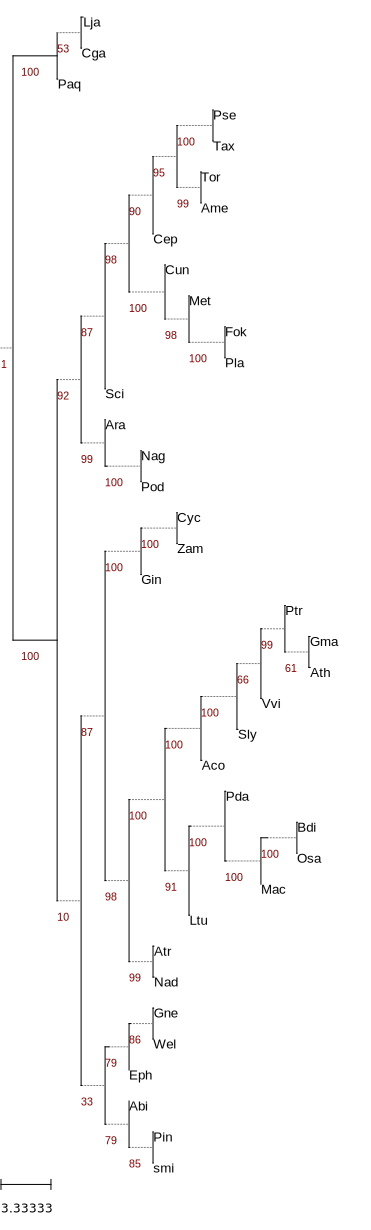

Gaps larger than 2; 1086 gaps total:


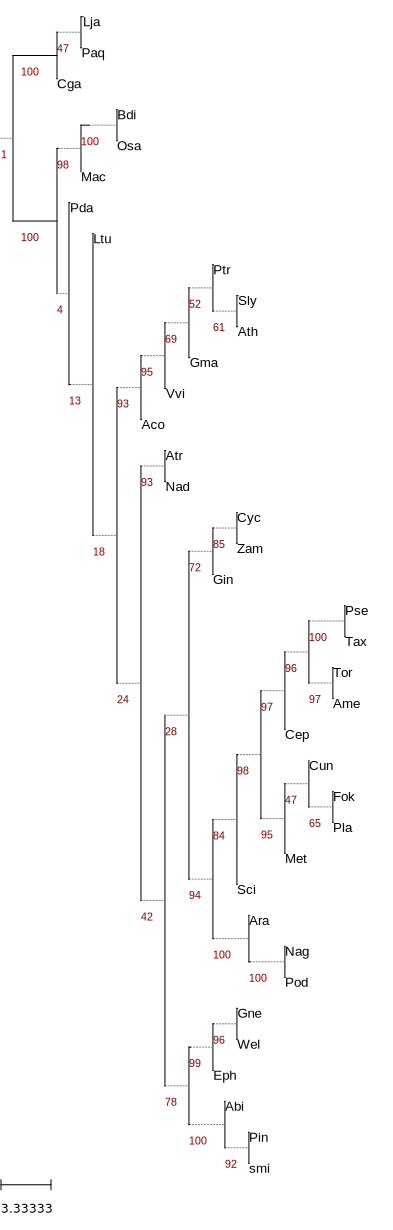

Gaps larger than 3; 622 gaps total:


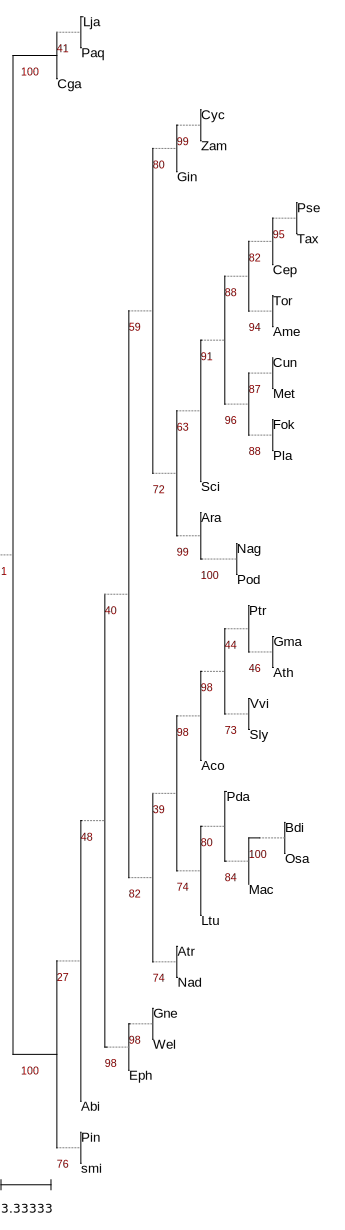

Gaps larger than 4; 389 gaps total:


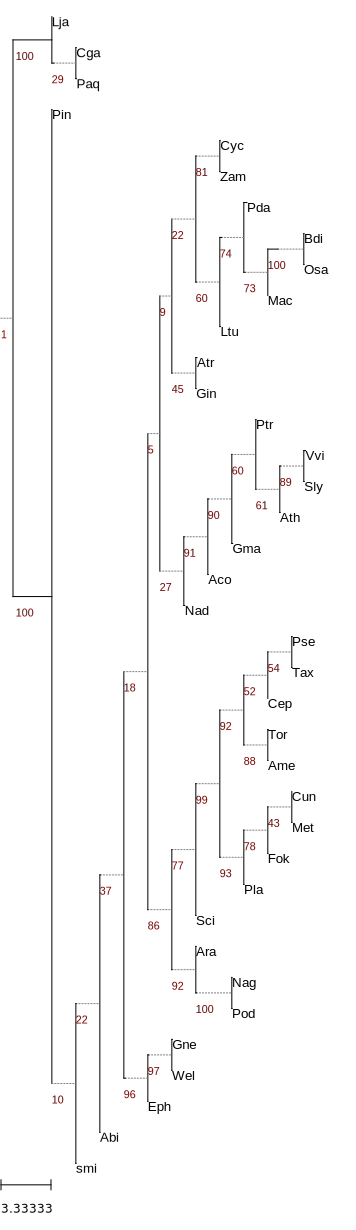

Gaps larger than 5; 271 gaps total:


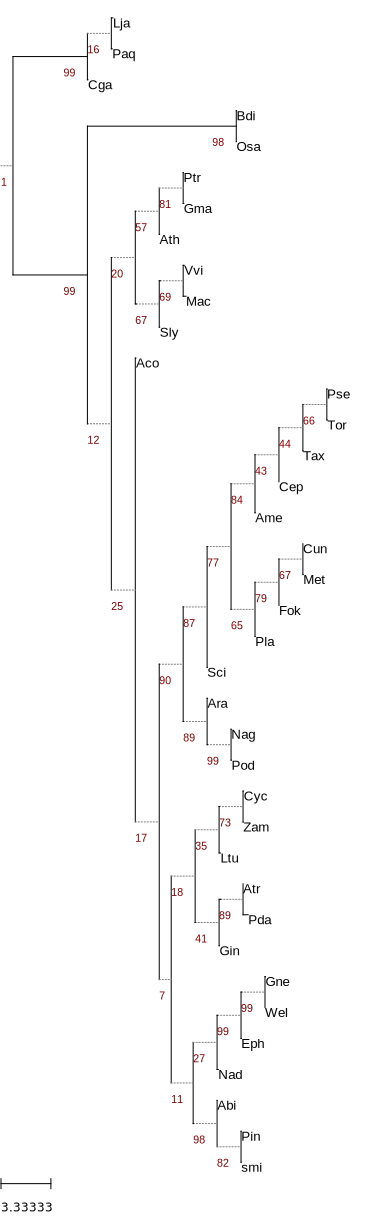

Gaps larger than 6; 221 gaps total:


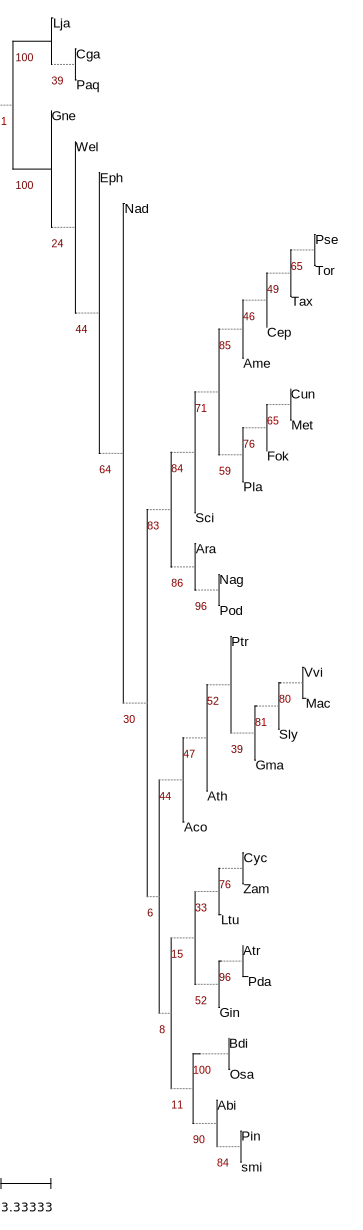

Gaps larger than 7; 179 gaps total:


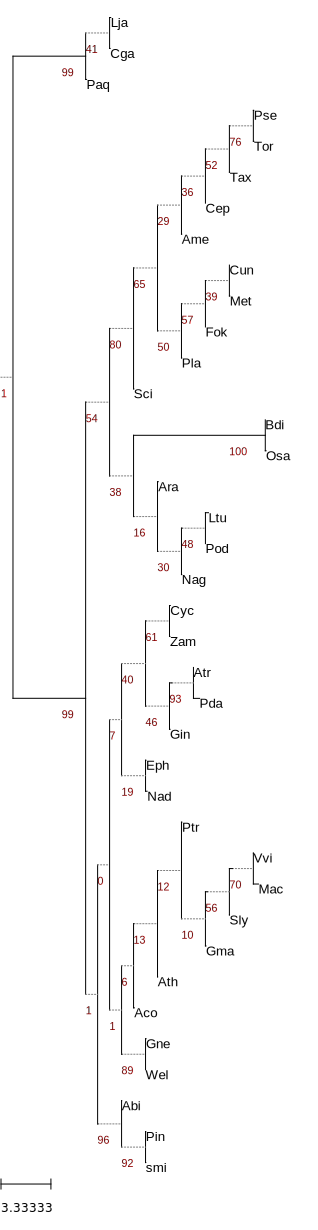

Gaps larger than 8; 152 gaps total:


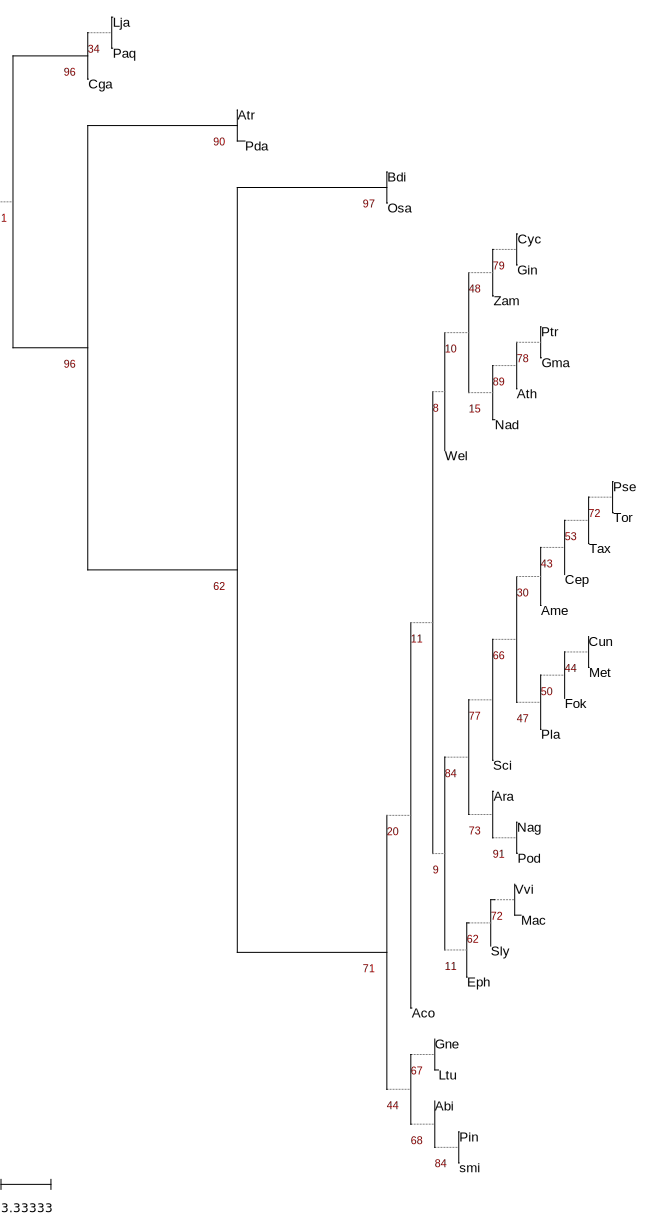

Gaps larger than 9; 141 gaps total:


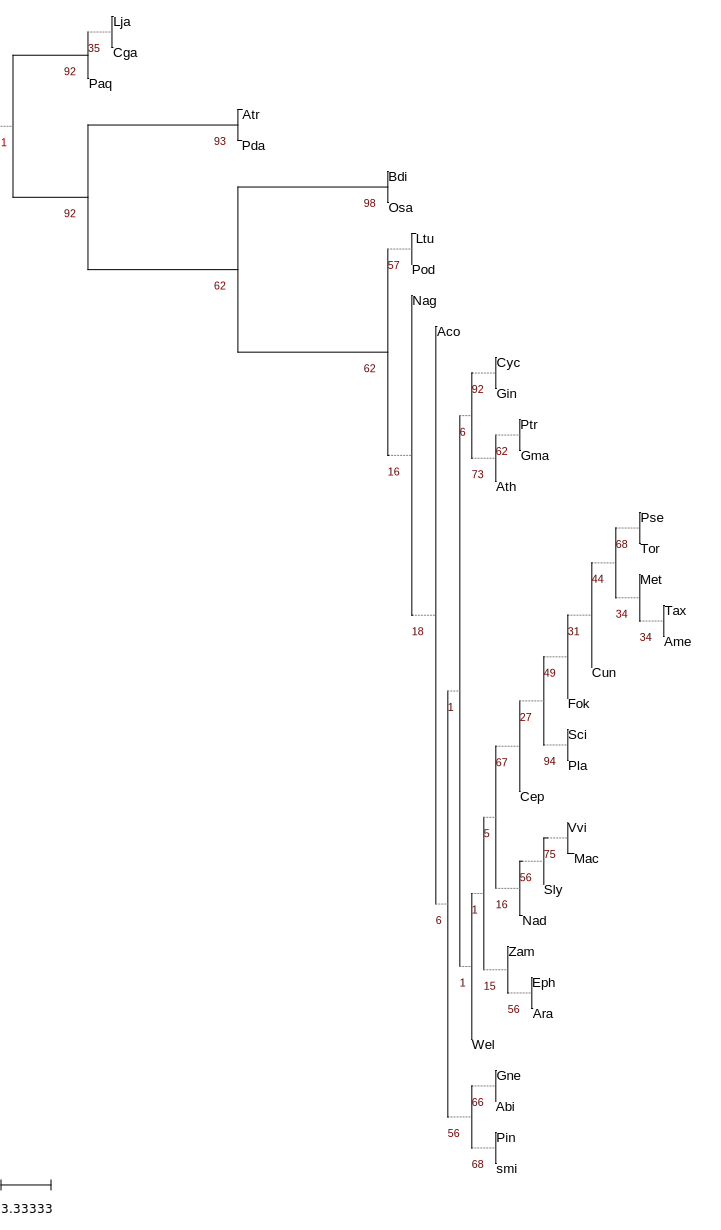

Gaps larger than 10; 123 gaps total:


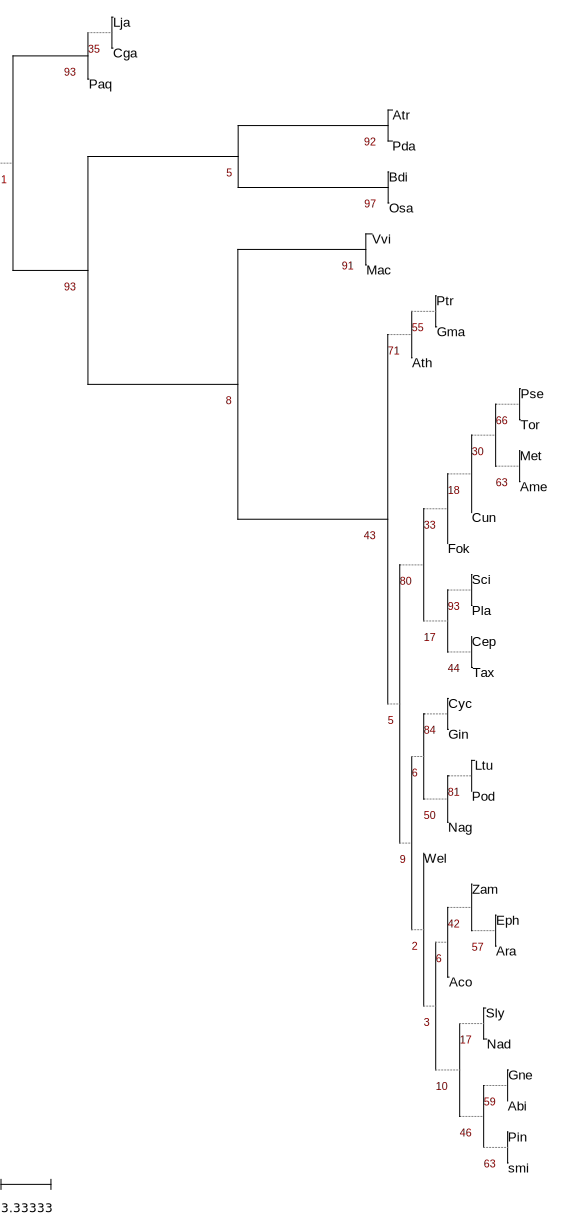

Gaps larger than 11; 113 gaps total:


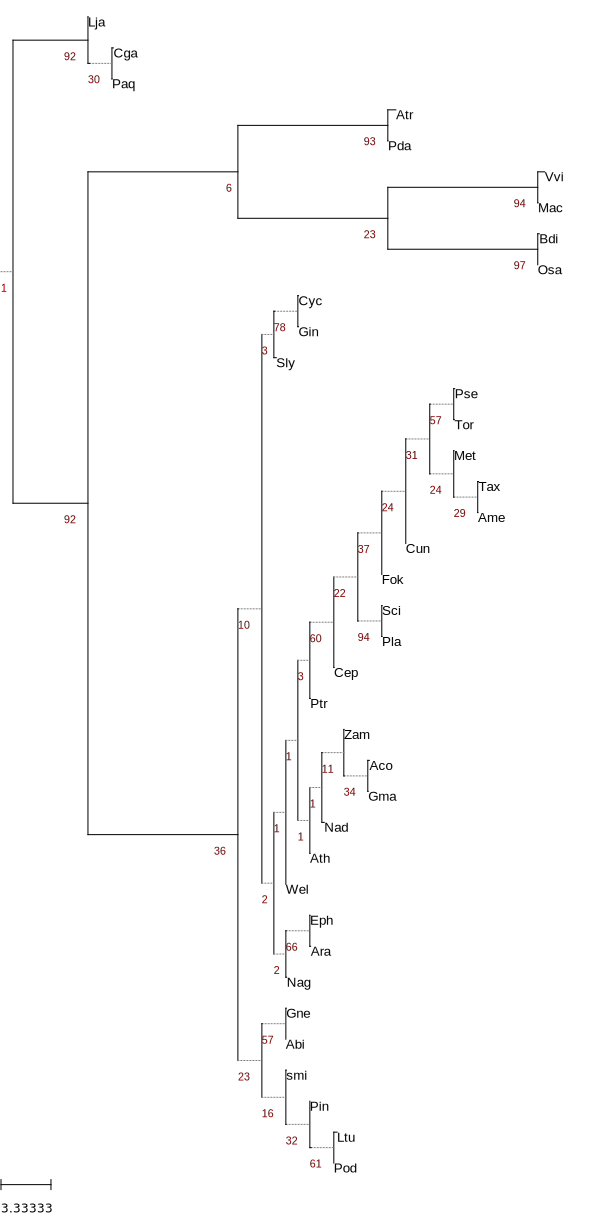

Gaps larger than 12; 101 gaps total:


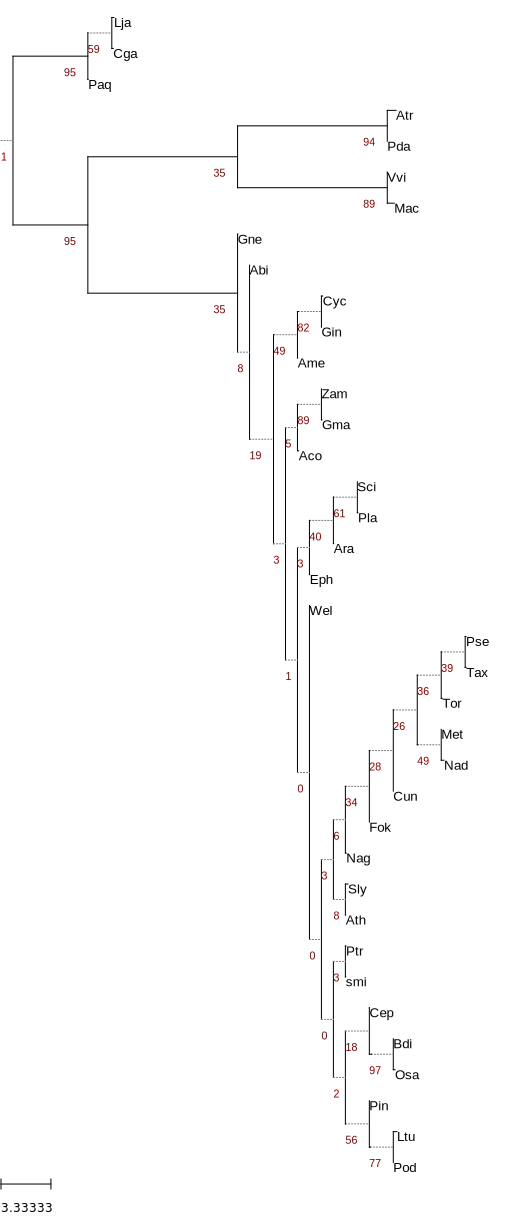

Gaps larger than 13; 98 gaps total:


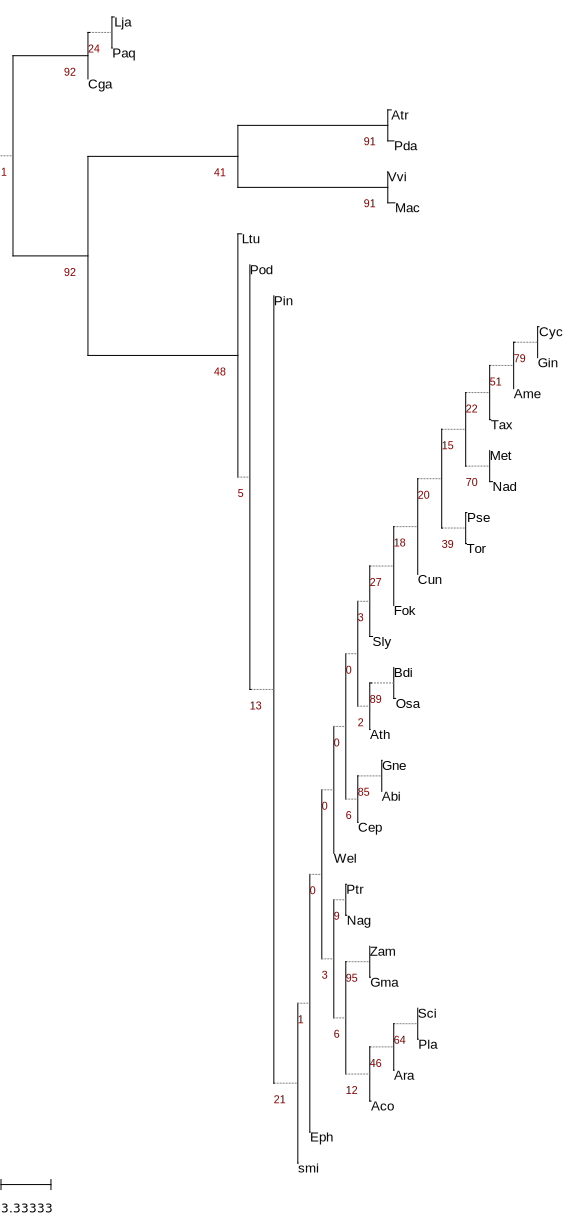

Gaps larger than 14; 91 gaps total:


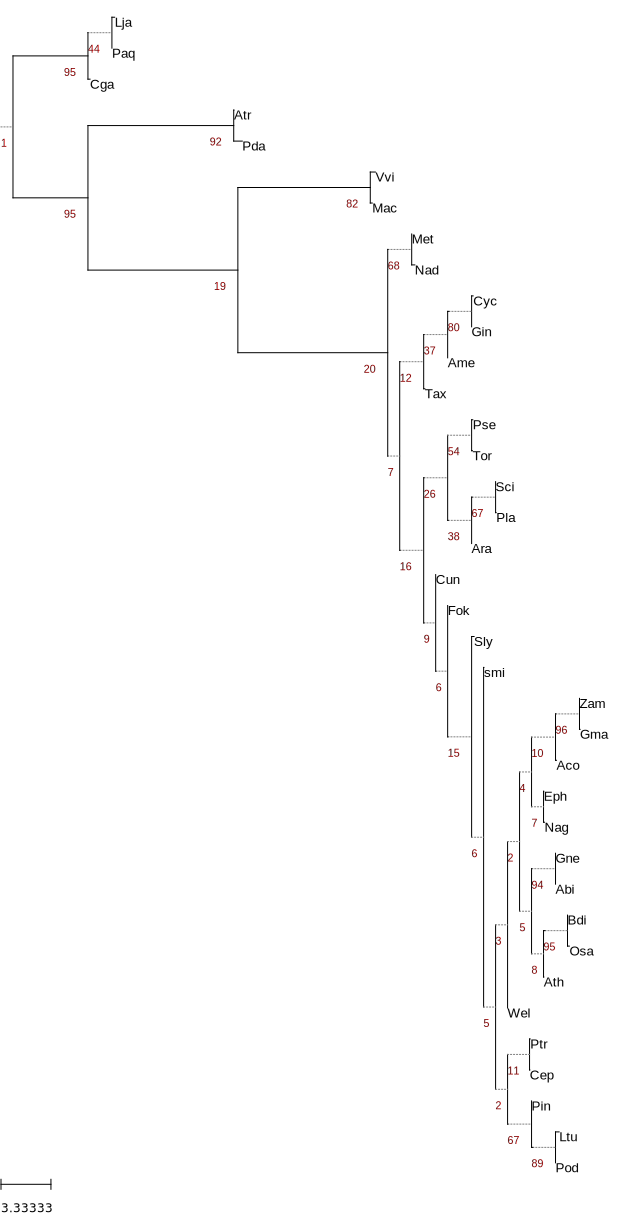

Gaps larger than 15; 89 gaps total:


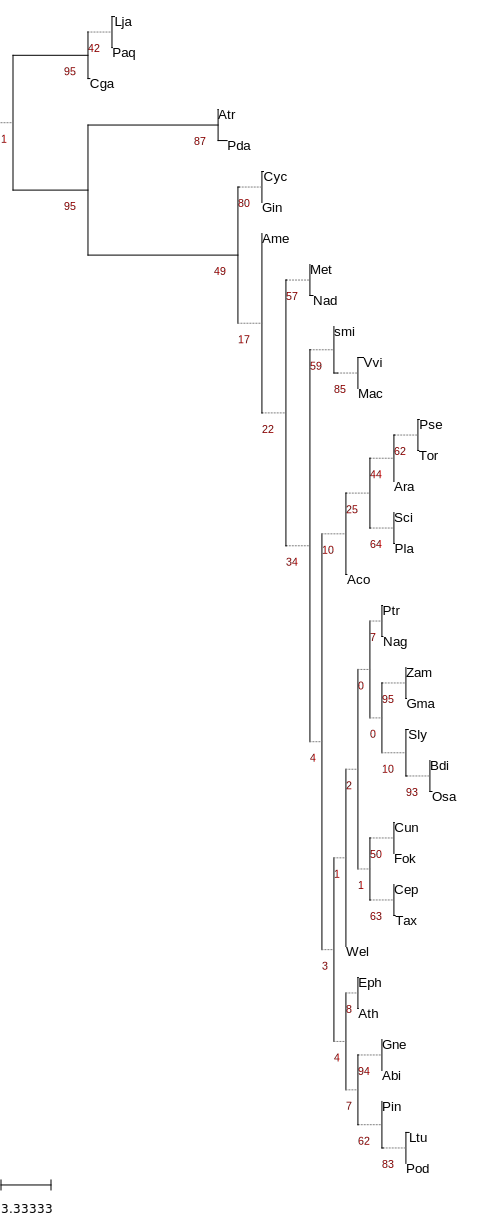

Gaps larger than 16; 87 gaps total:


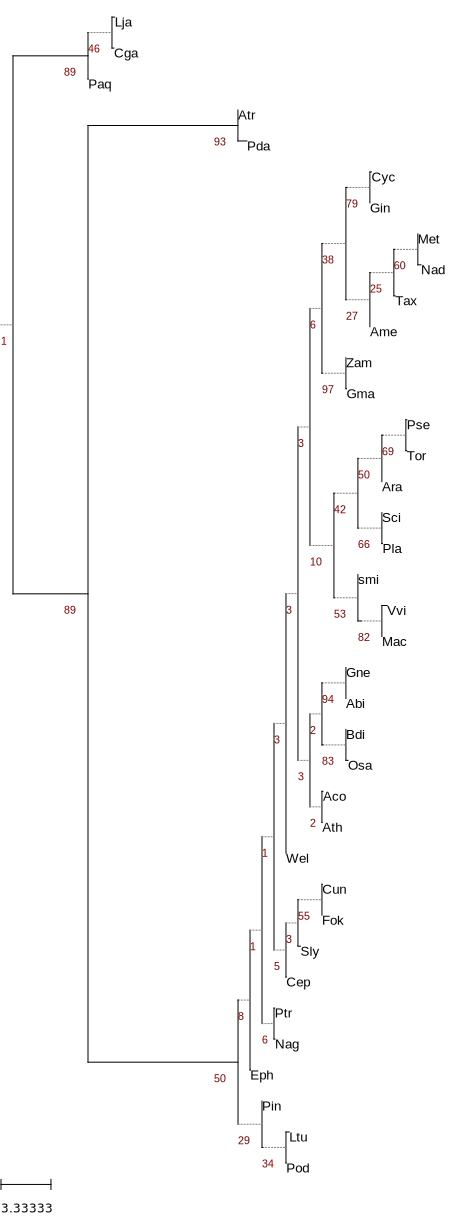

Gaps larger than 17; 84 gaps total:


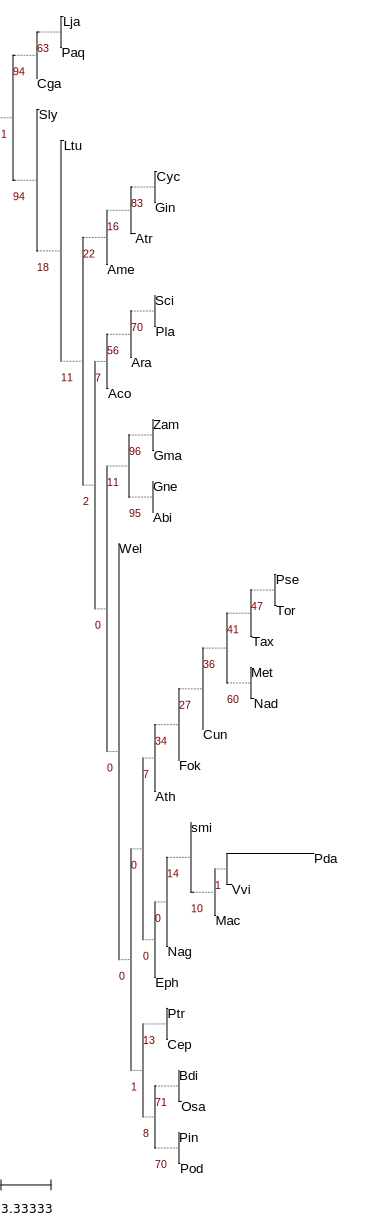

Gaps larger than 18; 81 gaps total:


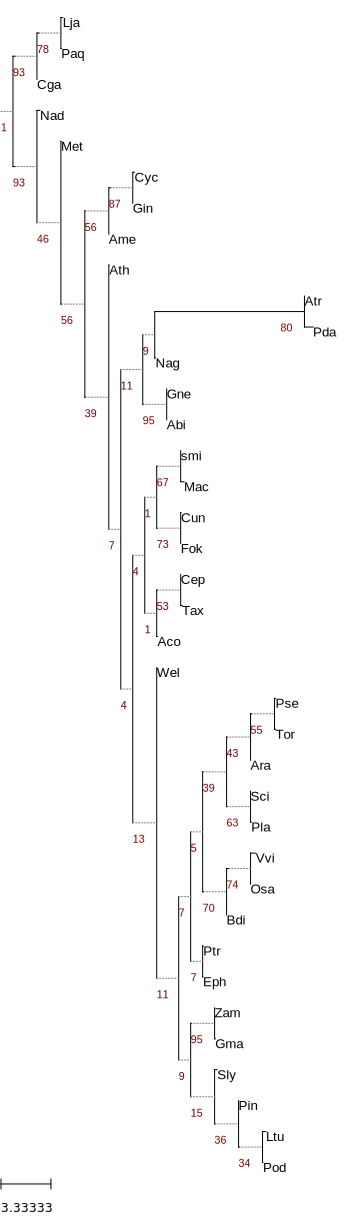

Gaps larger than 19; 75 gaps total:


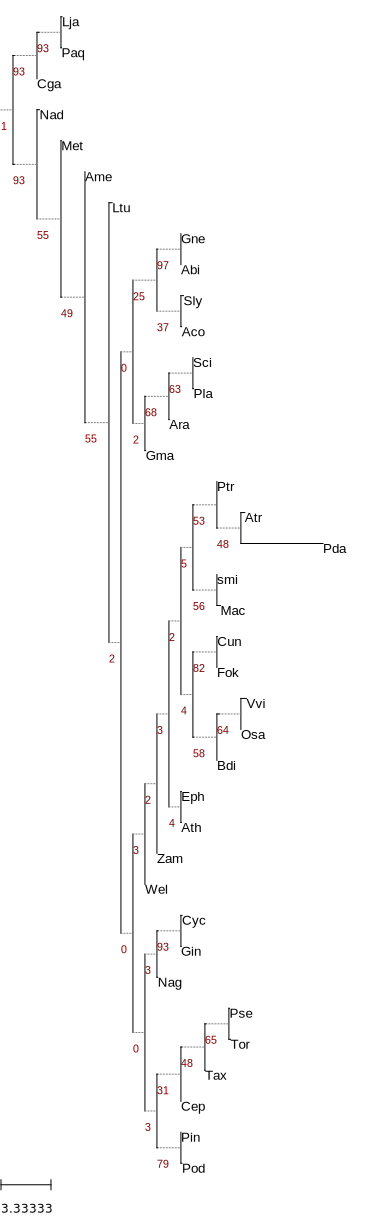

Gaps larger than 20; 71 gaps total:


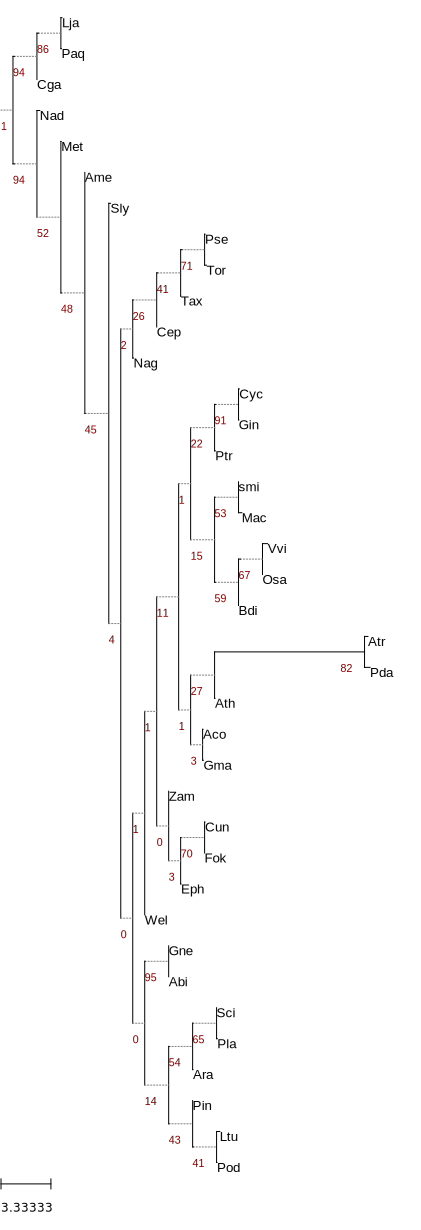

In [8]:
for i in range(len(treeFiles)):
    print(names[i])
    t = readTreeFromFile(treeFiles[i])
    t, ts = plotPhylogram(t, 15)
    file = "pictures/phylogram_" + str(i) + ".svg"
    t.render(file, tree_style= ts)
    display(SVG(filename=file))
    #t, ts = plotCladogram(t)
    #file = "pictures/cladogram_" + str(i) + ".svg"
    #t.render(file, tree_style= ts)
    #display(SVG(filename=file))

    